In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [229]:
card=pd.read_csv(r"C:\Users\Rgarud\Desktop\cloudstrats\Credit card project\data\clean_dataset.csv")

In [230]:
card.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [231]:
card.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [232]:
card.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object

### #label encoder for Ethnicity

In [233]:
card["Ethnicity"].value_counts()

White     408
Black     138
Asian      59
Latino     57
Other      28
Name: Ethnicity, dtype: int64

In [234]:
model_ethnicity=LabelEncoder()
model_ethnicity.fit(card["Ethnicity"])
card["Ethnicity"]=model_ethnicity.transform(card["Ethnicity"])

In [235]:
card["Ethnicity"].value_counts()

4    408
1    138
0     59
2     57
3     28
Name: Ethnicity, dtype: int64

In [236]:
card.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,4,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,1,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,1,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,4,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,4,1.71,1,0,0,0,ByOtherMeans,120,0,1


### Label Encoder for Industry

In [237]:
card["Industry"].value_counts()

Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

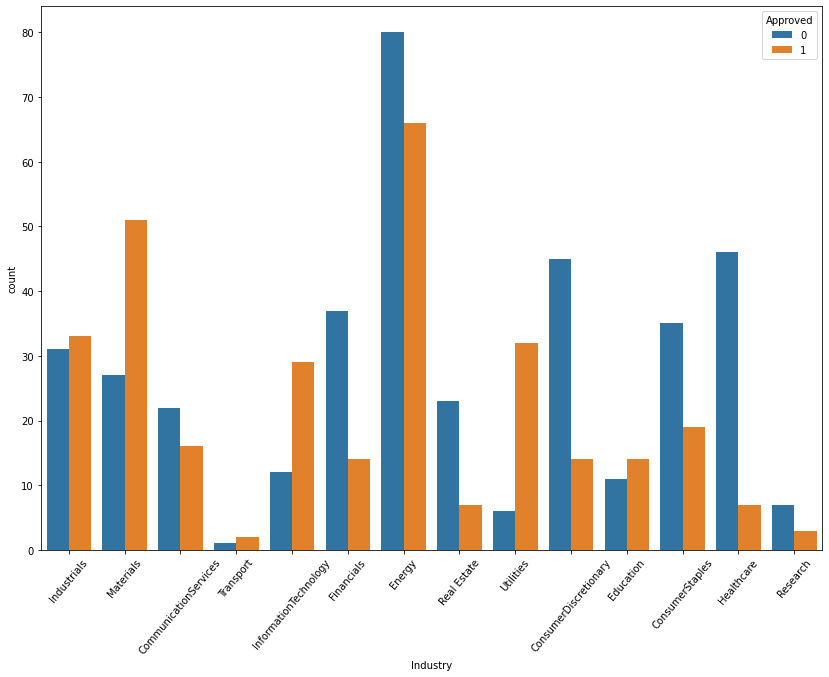

In [238]:
plt.figure(figsize=(14,10))
sns.countplot("Industry",data=card,dodge=True,hue="Approved")
plt.xticks(rotation=50)

In [239]:
model_Industry=LabelEncoder()
model_Industry.fit(card["Industry"])
card["Industry"]=model_Industry.transform(card["Industry"])

# model_ethnicity=LabelEncoder()
# model_ethnicity.fit(card["Ethnicity"])
# card["Ethnicity"]=model_ethnicity.transform(card["Ethnicity"])

In [240]:
card["Industry"].value_counts()

4     146
9      78
7      64
1      59
2      54
6      53
5      51
8      41
13     38
0      38
10     30
3      25
11     10
12      3
Name: Industry, dtype: int64

In [241]:
card.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,ByOtherMeans,120,0,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

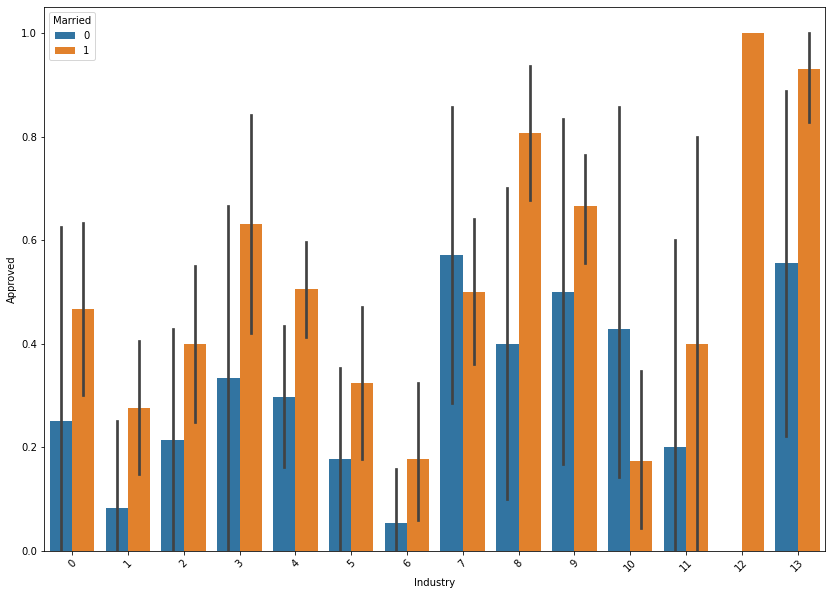

In [242]:
plt.figure(figsize=(14,10))
sns.barplot(x="Industry",y="Approved",data=card,hue="Married")
plt.xticks(rotation=45)

In [243]:
card.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,ByOtherMeans,120,0,1


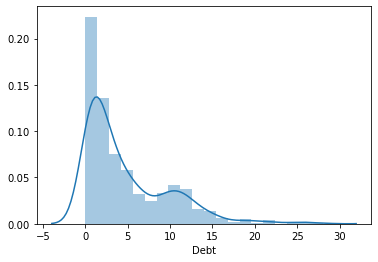

In [244]:
sns.distplot(card["Debt"])

In [245]:
card.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [246]:
card["Citizen"].value_counts()

ByBirth         625
ByOtherMeans     57
Temporary         8
Name: Citizen, dtype: int64

In [247]:
model_citizen=LabelEncoder()
model_citizen.fit(card["Citizen"])
card["Citizen"]=model_citizen.transform(card["Citizen"])

In [248]:
card["Citizen"].value_counts()

0    625
1     57
2      8
Name: Citizen, dtype: int64

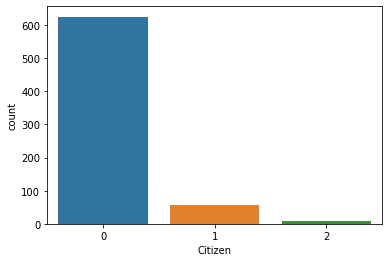

In [249]:
sns.countplot(x="Citizen",data=card)

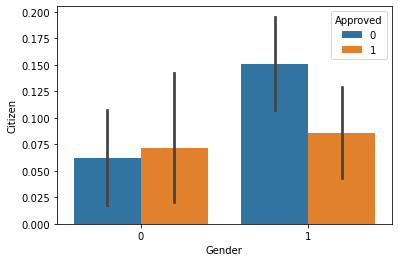

In [250]:
sns.barplot( x="Gender",y="Citizen",data=card,hue="Approved")

In [251]:
card.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,120,0,1


In [252]:
card.drop(columns="ZipCode",axis=1,inplace=True)

In [253]:
card.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,0,1


In [254]:
card["YearsEmployed"].unique()

array([ 1.25 ,  3.04 ,  1.5  ,  3.75 ,  1.71 ,  2.5  ,  6.5  ,  0.04 ,
        3.96 ,  3.165,  2.165,  4.335,  1.   ,  5.   ,  0.25 ,  0.96 ,
        3.17 ,  0.665,  0.75 ,  0.835,  7.875,  3.085,  0.5  ,  5.165,
       15.   ,  7.   ,  5.04 ,  7.96 ,  7.585,  0.415,  2.   ,  1.835,
       14.415,  4.5  ,  5.335,  8.625, 28.5  ,  2.625,  0.125,  6.04 ,
        3.5  ,  0.165,  0.875,  1.75 ,  0.   ,  7.415,  0.085,  5.75 ,
        6.   ,  3.   ,  1.585,  4.29 ,  1.54 ,  1.46 ,  1.625, 12.5  ,
       13.5  , 10.75 ,  0.375,  0.585,  0.455,  4.   ,  8.5  ,  9.46 ,
        2.25 , 10.   ,  0.795,  1.375,  1.29 , 11.5  ,  6.29 , 14.   ,
        0.335,  1.21 ,  7.375,  7.5  ,  3.25 , 13.   ,  5.5  ,  4.25 ,
        0.625,  5.085,  2.75 ,  2.375,  8.   ,  1.085,  2.54 ,  4.165,
        1.665, 11.   ,  9.   ,  1.335,  1.415,  1.96 ,  2.585,  5.125,
       15.5  ,  0.71 ,  5.665, 18.   ,  5.25 ,  8.665,  2.29 , 20.   ,
        2.46 , 13.875,  2.085,  4.58 ,  2.71 ,  2.04 ,  0.29 ,  4.75 ,
      

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 8 Text major ticklabel objects>)

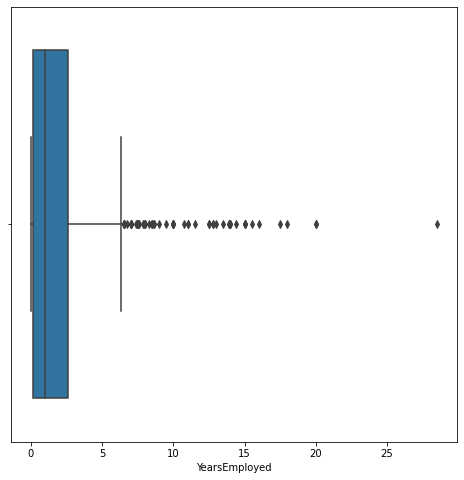

In [255]:
plt.figure(figsize=(8,8))
sns.boxplot(x="YearsEmployed",data=card,hue="Approved")
plt.xticks(rotation=0)

In [256]:
card.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,0,1


### training and testing

In [257]:
x=card.drop(columns="Approved")
y=card["Approved"]

In [258]:
x.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,0
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,560
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,824
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,3
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,0


In [259]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Approved, dtype: int64

### training and testing data

In [260]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [261]:
x_train

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income
560,0,25.00,12.330,1,1,8,1,3.500,1,1,6,0,0,458
327,1,40.83,3.500,1,1,1,0,0.500,0,0,0,0,1,0
296,1,69.17,9.000,1,1,6,2,4.000,0,1,1,0,0,6
454,1,52.42,1.500,1,1,10,4,3.750,0,0,0,1,0,350
662,0,23.50,1.500,1,1,7,4,0.875,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,20.67,5.290,1,1,9,4,0.375,1,1,1,0,0,0
38,1,27.75,0.585,0,0,8,4,0.250,1,1,2,0,0,500
274,1,30.67,2.500,1,1,8,1,2.250,0,0,0,1,1,0
466,1,31.08,3.085,1,1,4,4,2.500,0,1,2,1,0,41


In [262]:
x_test

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income
47,1,31.92,4.460,1,1,8,1,6.040,1,1,3,0,0,300
667,0,17.92,0.540,1,1,4,4,1.750,0,1,1,1,0,5
626,1,22.00,7.835,0,0,1,0,0.165,0,0,0,1,0,0
379,1,33.58,0.250,1,1,1,0,4.000,0,0,0,1,1,0
125,1,34.92,5.000,1,1,13,1,7.500,1,1,6,1,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0,31.25,3.750,1,1,8,1,0.625,1,1,9,1,0,0
323,1,48.58,0.205,0,0,5,4,0.250,1,1,11,0,0,2732
165,0,40.83,10.000,1,1,9,1,1.750,1,0,0,0,0,837
543,1,36.33,3.790,1,1,7,4,1.165,1,0,0,1,0,0


In [263]:
y_train

560    1
327    0
296    0
454    0
662    0
      ..
75     0
38     1
274    0
466    0
487    0
Name: Approved, Length: 621, dtype: int64

In [264]:
y_test

47     1
667    0
626    0
379    0
125    1
      ..
140    1
323    1
165    1
543    0
684    0
Name: Approved, Length: 69, dtype: int64

### SVM

In [265]:
classifier=svm.SVC(kernel="linear")

In [266]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [267]:
x_test_prediction=classifier.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [268]:
testing_data_accuracy

0.8840579710144928

In [269]:
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [270]:
training_data_accuracy

0.8470209339774557

Text(0.5, 1.0, 'Correlation Matrix for credit card approval')

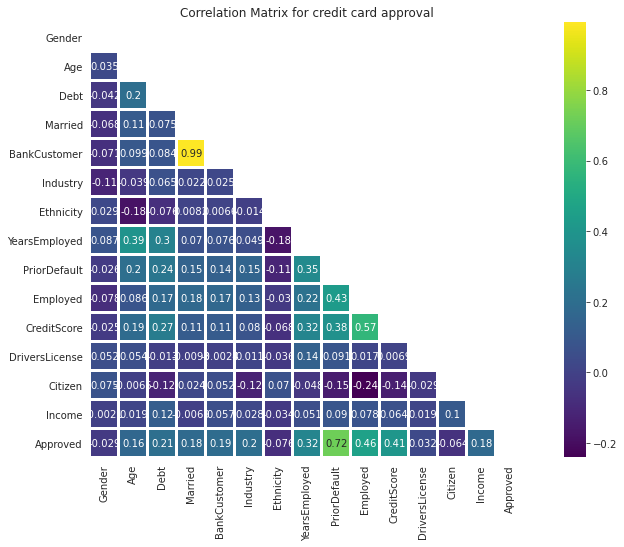

In [271]:
plt.figure(figsize=(14,8))

corr = card.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True,linewidths=2, cmap='viridis')
plt.title('Correlation Matrix for credit card approval')

### logistic regression

In [272]:
lr=LogisticRegression()

In [273]:
lr.fit(x_train,y_train)

C:\Users\Rgarud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [274]:
lr_prediction=lr.predict(x_test)

In [278]:
print(confusion_matrix(y_test,lr_prediction),"\n")
print(classification_report(y_test,lr_prediction),"\n")
print("Accuracy Score of Lr",accuracy_score(y_test,lr_prediction))

[[34  4]
 [ 4 27]] 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.87      0.87      0.87        31

    accuracy                           0.88        69
   macro avg       0.88      0.88      0.88        69
weighted avg       0.88      0.88      0.88        69
 

Accuracy Score of Lr 0.8840579710144928


### decision tree

In [280]:
dt=DecisionTreeClassifier()

In [282]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [283]:
dt_prediction=dt.predict(x_test)

In [284]:
print(confusion_matrix(y_test,dt_prediction),"\n")
print(classification_report(y_test,dt_prediction),"\n")
print("Accuracu Score of DT",accuracy_score(y_test,dt_prediction))

[[29  9]
 [ 3 28]] 

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        38
           1       0.76      0.90      0.82        31

    accuracy                           0.83        69
   macro avg       0.83      0.83      0.83        69
weighted avg       0.84      0.83      0.83        69
 

Accuracu Score of DT 0.8260869565217391
